In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Activation,Input,BatchNormalization,Flatten, Dense, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def VGG16(input_shape,num_units):
    inputs = Input(shape=input_shape)

    def actconv(inputs, num_filters):
        x=Conv2D(filters=num_filters,kernel_size=(3,3),strides=(1,1),padding='same')(inputs)
        x=BatchNormalization()(x)
        x=Activation(activation='relu')(x)
        return x

    x=actconv(inputs,num_filters=64)
    x=actconv(x,num_filters=64)
    x=MaxPool2D(strides=(2,2))(x)

    x=actconv(x,num_filters=128)
    x=actconv(x,num_filters=128)
    x=MaxPool2D(strides=(2,2))(x)

    x=actconv(x,num_filters=256)
    x=actconv(x,num_filters=256)
    x=actconv(x,num_filters=256)
    x=MaxPool2D(strides=(2,2))(x)

    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=MaxPool2D(strides=(2,2))(x)

    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=actconv(x,num_filters=512)
    x=MaxPool2D(strides=(2,2))(x)

    x=Flatten()(x)
    x=Dense(units=4096,activation='relu')(x)
    x=Dense(units=1000,activation='relu')(x)
    x=Dropout(0.5)(x)
    outputs=Dense(units=10,activation='softmax')(x)

    model=Model(inputs,outputs)
    return model


model=VGG16(input_shape=(32,32,3),num_units=10)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [4]:
def load_cifar10_dataset():
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = cifar10.load_data()
    
    train_validation_images = train_validation_images / 255
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [5]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_cifar10_dataset()


train_y = tf.keras.utils.to_categorical(train_y,10)

validation_y = tf.keras.utils.to_categorical(validation_y,10)

test_y = tf.keras.utils.to_categorical(test_y,10)

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링할 성능 지표
                               patience=5,          # 성능 향상이 없을 때 몇 번까지 기다릴지 설정
                               restore_best_weights=True)  # 최적의 가중치로 복원할지 여부

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=40, batch_size=64,validation_data=(validation_x, validation_y))

test_loss, test_acc = model.evaluate(test_x, test_y)


Train set
Image : (40000, 32, 32, 3)
Label : (40000, 1)
Validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train & validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 30s 744us/sample - loss: 2.0437 - accuracy: 0.2019 - val_loss: 2.0155 - val_accuracy: 0.2541
Epoch 2/40
40000/40000 [==============================] - 25s 631us/sample - loss: 1.5856 - accuracy: 0.3732 - val_loss: 2.8850 - val_accuracy: 0.2284
Epoch 3/40
40000/40000 [==============================] - 25s 631us/sample - loss: 1.2398 - accuracy: 0.5405 - val_loss: 1.2524 - val_accuracy: 0.5621
Epoch 4/40
40000/40000 [==============================] - 25s 632us/sample - loss: 0.9942 - accuracy: 0.6496 - val_loss: 1.1746 - val_accuracy: 0.6190
Epoch 5/40
40000/40000 [==============================] - 25s 633us/sample - loss: 0.8324 - accuracy: 0.7131 - val_loss: 1.1025 - val_accuracy: 0.6629
Epoch 6/4

In [6]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.8342000246047974


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


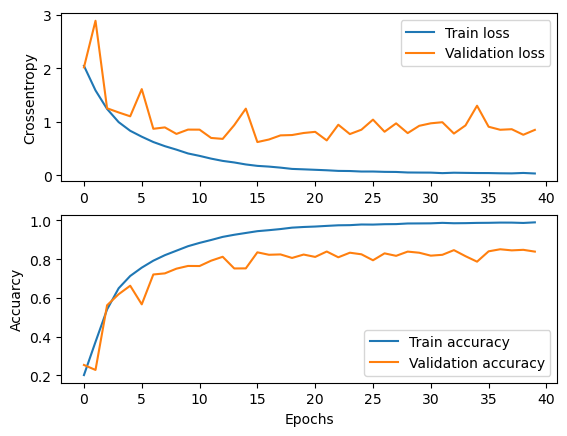

In [7]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

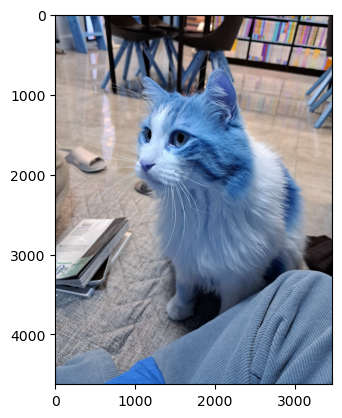

In [8]:
import cv2
img = cv2.imread('cat_image.jpg') #사진 읽어들이기

#이미지 출력

plt.imshow(img)
plt.show()


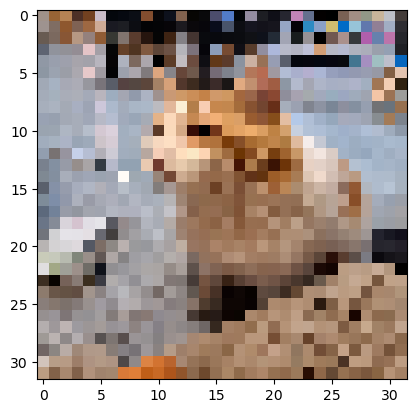

'\nresize는 이미지 크기가 변하는 것이 아닌 픽셀 수가 변경되는 것이다. 픽셀수를 줄이면\n그만큼 파일을 손상한 것이기 때문에 다시 늘린다고 원본의 해상도로 돌릴 수 없다.\n'

In [9]:
img=cv2.resize(img,(32,32))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

"""
resize는 이미지 크기가 변하는 것이 아닌 픽셀 수가 변경되는 것이다. 픽셀수를 줄이면
그만큼 파일을 손상한 것이기 때문에 다시 늘린다고 원본의 해상도로 돌릴 수 없다.
"""


In [10]:
img = np.expand_dims(img, axis=0)  # 4차원으로 확장
print(img.shape)

(1, 32, 32, 3)


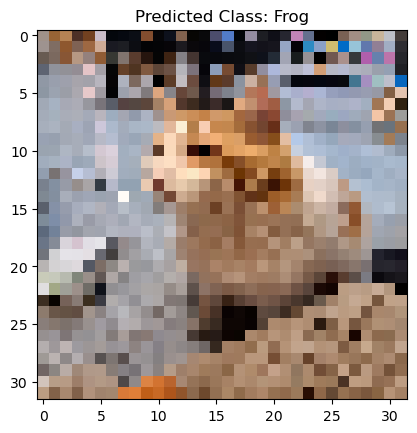

In [11]:
predictions = model.predict(img)

# Define the class labels for CIFAR-10
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Interpret the results
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

# Display the image and predicted class label
plt.title(f"Predicted Class: {predicted_label}")
plt.imshow(img[0])
plt.show()